In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)


In [2]:
train_df = pd.read_csv('train.tsv', sep='\t')
#train_df['revenue'] = np.log(train_df['revenue'])
print(train_df.columns)
remove_cols = ['status']

train_df


Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')


,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,/4nfAhOTlfZUHNorHJXEib7GYFpp.jpg,"[{'id': 1950, 'logo_path': None, 'name': 'New ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1987-09-11,14564027,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,/ySI88wO1IFyKGWpSKRTSPilE3t2.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",1983-07-28,61399552,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,NaN,"{'id': 239968, 'name': 'La cage aux folles Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,78159,tt0088873,fr,"La cage aux folles III - ""Elles"" se marien

In [3]:
train_df.notna().sum()

backdrop_path            4638
belongs_to_collection    1065
budget                   5215
genres                   5215
homepage                 1766
id                       5215
imdb_id                  5200
original_language        5215
original_title           5215
overview                 5209
popularity               5215
poster_path              5048
production_companies     5215
production_countries     5215
release_date             5215
revenue                  5215
runtime                  5211
spoken_languages         5215
status                   5215
tagline                  4190
title                    5215
video                    5215
vote_average             5215
vote_count               5215
Keywords                 5215
cast                     5215
crew                     5215
dtype: int64

In [4]:
train_df['vote_average'].describe()

count    5215.000000
mean        6.399099
std         0.943931
min         0.000000
25%         5.900000
50%         6.400000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64

# Correlation Matrix

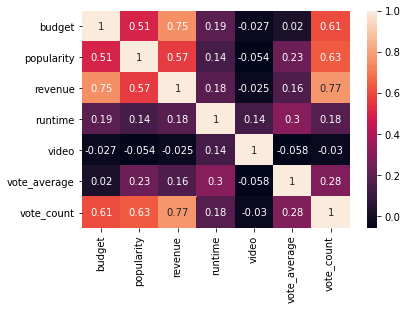

In [5]:
################
# We can see high corrleation between revenue and budget (0.75) + vote_count (0.77). 
# Also pretty high correlation between revenue and populairty (0.57)
###############

corr = train_df[['budget','popularity','revenue','runtime','video','vote_average','vote_count']].corr()
sn.heatmap(corr, annot=True)
plt.show()

# Month

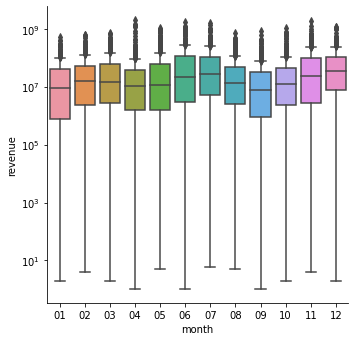

In [6]:
train_df['month'] = train_df['release_date'].str[5:7]
sns.catplot(data=train_df.sort_values('month'), y='revenue', x='month', kind='box')
plt.yscale('log')


# Year

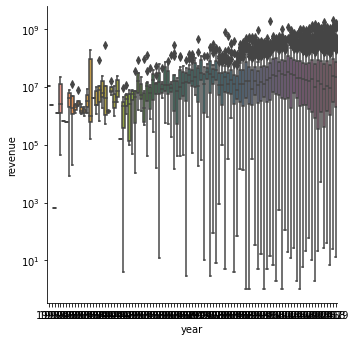

In [7]:
train_df['year'] = train_df['release_date'].str[:4]
sns.catplot(data=train_df.sort_values('year'), y='revenue', x='year', kind='box')
plt.yscale('log')

# Popularity 

Text(0.5, 0, 'Popularity')

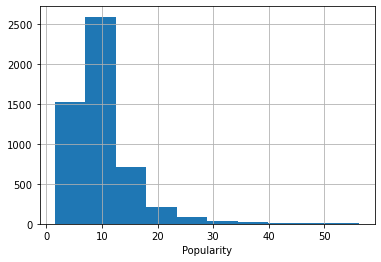

In [8]:
train_df[train_df['popularity']<60]['popularity'].hist()
plt.xlabel('Popularity')
#train_df[train_df['popularity']<60].boxplot('popularity')

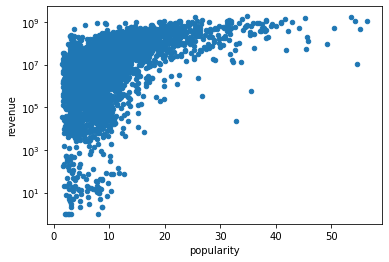

In [9]:
train_df[train_df['popularity']<60].plot.scatter('popularity', 'revenue')
plt.yscale('log')

# Vote Average

Text(0.5, 0, 'Vote Average')

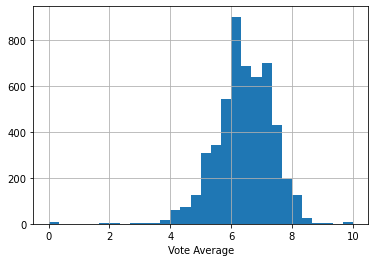

In [10]:
#train_df[train_df['vote_count']<50]['vote_average'].hist(bins=30)
train_df['vote_average'].hist(bins=30)
plt.xlabel('Vote Average')



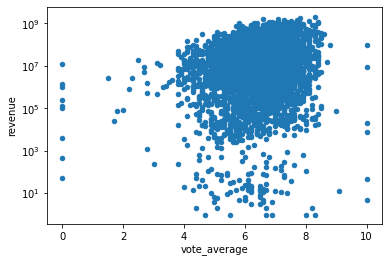

In [11]:
train_df.plot.scatter('vote_average', 'revenue')
plt.yscale('log')

# Vote Count

Text(0.5, 0, 'Vote Count')

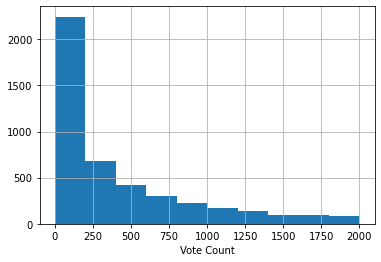

In [12]:
train_df[train_df['vote_count']<2000]['vote_count'].hist()
plt.xlabel('Vote Count')

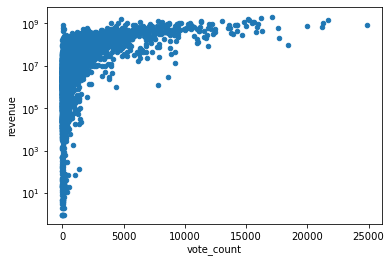

In [13]:
train_df[train_df['vote_count']>-1].plot.scatter('vote_count', 'revenue')
plt.yscale('log')

# Budget

In [14]:
train_df[train_df['budget']>0]['budget'].describe()

count    3.728000e+03
mean     3.004734e+07
std      3.984283e+07
min      1.000000e+00
25%      5.000000e+06
50%      1.550000e+07
75%      3.800000e+07
max      3.800000e+08
Name: budget, dtype: float64

backdrop_path            1184
belongs_to_collection     209
budget                   1487
genres                   1487
homepage                  378
id                       1487
imdb_id                  1483
original_language        1487
original_title           1487
overview                 1482
popularity               1487
poster_path              1384
production_companies     1487
production_countries     1487
release_date             1487
revenue                  1487
runtime                  1484
spoken_languages         1487
status                   1487
tagline                   967
title                    1487
video                    1487
vote_average             1487
vote_count               1487
Keywords                 1487
cast                     1487
crew                     1487
month                    1487
year                     1487
dtype: int64


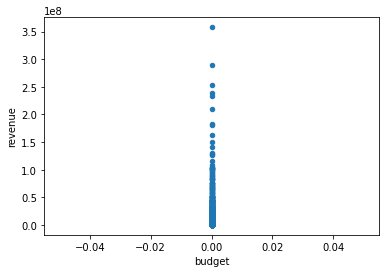

In [15]:
print(train_df[train_df['budget']==0].count())
train_df[train_df['budget']==0].plot.scatter('budget', 'revenue') #.count())
#train_df[train_df['budget']<=100000000].boxplot(column=['budget'])
#plt.xscale('log')


Text(0.5, 0, 'Budget')

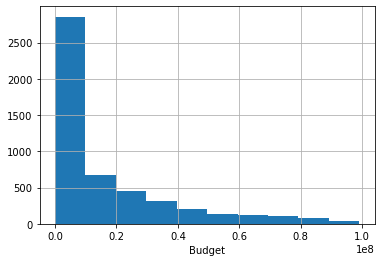

In [16]:
train_df[train_df['budget']<100000000]['budget'].hist()
plt.xlabel('Budget')

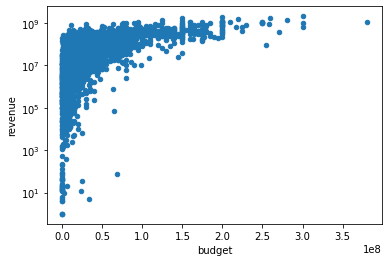

In [17]:
train_df[train_df['budget']>0].plot.scatter('budget', 'revenue')
plt.yscale('log')

# Original Language

In [18]:

#train_df['original_language'].value_counts()
train_df.groupby('original_language')['revenue'].agg(['mean','count']).sort_values('count', ascending = False)

,mean,count
original_language,,
en,7.341449e+07,4385
fr,1.269365e+07,148
hi,2.055550e+07,119
ja,3.778756e+07,77
es,1.503627e+07,73
ru,9.993305e+06,63
ko,3.652930e+07,48
it,1.121320e+07,46
zh,1.151135e+08,40


# Belongs to Collection

In [19]:
df_collection = pd.read_csv('small tables/belongs_to_collection.csv')
df_collection = df_collection.rename(columns={'id':'id_collection'})

In [20]:
# We can see here difference in average revenue 

df_join = train_df.merge(df_collection, left_on = 'id', right_on = 'id_movie')
#df_join = 
df_join.groupby(df_join['id_collection'].notna())['revenue'].agg(['mean','median', 'count'])


,mean,median,count
id_collection,,,
False,4.324850e+07,11388515,4150
True,1.516565e+08,55003135,1065


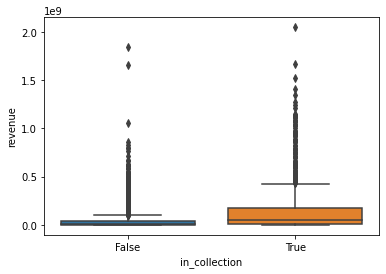

In [21]:
df_join['in_collection'] = df_join['id_collection'].notna()
ax = sns.boxplot(x="in_collection", y="revenue", data=df_join)

# Cast

In [22]:
df_cast = pd.read_csv('small tables/cast.csv')
df_cast = df_cast.rename(columns={'id':'id_actor'})


In [23]:
cast_size = df_cast.groupby('id_movie')['id_movie'].agg(['count'])
cast_size = cast_size.rename(columns={'count':'cast_size'})
#cast_size['count'].value_counts()

In [24]:
df_cast =  train_df.merge(cast_size, left_on = 'id', right_on = 'id_movie')

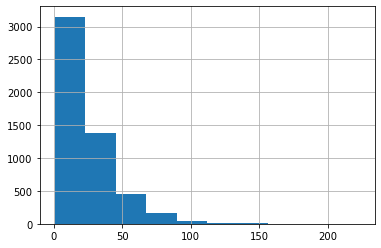

In [25]:
df_cast['cast_size'].hist()

0.391193223099984


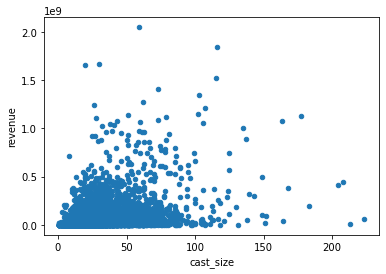

In [26]:
print(df_cast['cast_size'].corr(df_cast['revenue']))
df_cast.plot.scatter('cast_size', 'revenue')

# Crew

In [27]:
df_crew = pd.read_csv('small tables/crew.csv')
df_crew = df_crew.rename(columns={'id':'id_crew_member'})
#df_crew = df_crew.drop_duplicates(subset=['id_movie', 'id_crew_member'])

In [28]:
crew_size = df_crew.groupby('id_movie')['id_movie'].agg(['count'])
crew_size = crew_size.rename(columns={'count':'crew_size'})
#crew_size['count'].value_counts()

In [29]:
df_crew =  train_df.merge(crew_size, left_on = 'id', right_on = 'id_movie')

Text(0.5, 0, 'Crew Size')

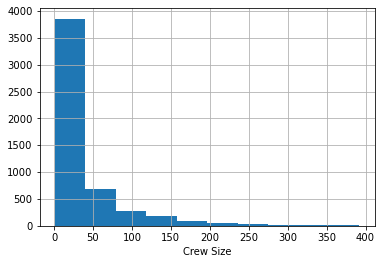

In [30]:
df_crew[df_crew['crew_size']<400]['crew_size'].hist()
plt.xlabel('Crew Size')

0.4877481266340946


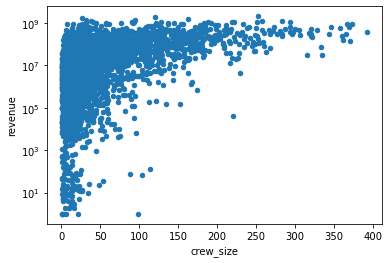

In [31]:
print(df_crew['crew_size'].corr(df_crew['revenue']))
df_crew[df_crew['crew_size']<400].plot.scatter('crew_size', 'revenue')
plt.yscale('log')

# Genres

In [32]:
df_genres = pd.read_csv('small tables/genres.csv')
df_genres = df_genres.rename(columns={'id':'id_genre', 'name':'genre_name'})

In [33]:
df_genres = train_df.merge(df_genres, left_on = 'id', right_on = 'id_movie')


In [34]:
df_genres.groupby('genre_name')['revenue'].agg(['count','mean']).sort_values('mean', ascending = False)

,count,mean
genre_name,,
Adventure,752,1.741649e+08
Animation,286,1.629370e+08
Fantasy,444,1.467376e+08
Family,479,1.442716e+08
Science Fiction,515,1.296170e+08
Action,1207,1.120170e+08
War,159,7.610942e+07
Comedy,1882,6.389128e+07
Thriller,1263,6.249463e+07


# Keywords

In [35]:
df_keyword = pd.read_csv('small tables/Keywords.csv')
df_keyword = df_keyword.rename(columns={'id':'id_keyword'})
#df_crew = df_crew.drop_duplicates(subset=['id_movie', 'id_crew_member'])

In [36]:
keyword_size = df_keyword.groupby('id_movie')['id_movie'].agg(['count'])
keyword_size = keyword_size.rename(columns={'count':'keyword_size'})
#crew_size['count'].value_counts()

In [37]:
df_keyword =  train_df.merge(keyword_size, left_on = 'id', right_on = 'id_movie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002463FDDD070>]],
      dtype=object)

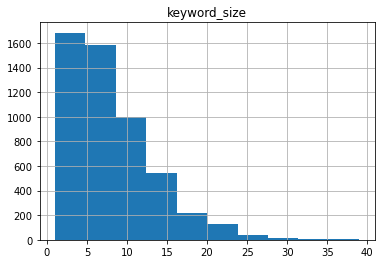

In [38]:
df_keyword[['keyword_size']].hist()

0.22513181519452705


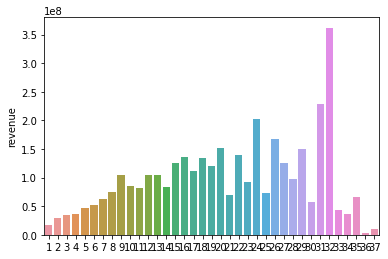

In [39]:
print(df_keyword['keyword_size'].corr(df_keyword['revenue']))
revenue_per_keyword_size = df_keyword.groupby('keyword_size').agg('mean')
revenue_per_keyword_size
ax = sns.barplot(x=[i for i in range(1,38)], y="revenue", data=revenue_per_keyword_size)
#df_keyword.plot.scatter('keyword_size', 'revenue')

# Production Companies

In [40]:
df_company = pd.read_csv('small tables/production_companies.csv')
df_company = df_company.rename(columns={'id':'id_company', 'name':'company_name'})

In [41]:
df_company = train_df.merge(df_company, left_on = 'id', right_on = 'id_movie')


In [42]:
df_company.groupby('company_name')['revenue'].agg(['count','mean']).sort_values('count', ascending = False).head(20)

,count,mean
company_name,,
Warner Bros. Pictures,344,1.403542e+08
Universal Pictures,339,1.159365e+08
Paramount,263,1.289151e+08
Columbia Pictures,256,1.263420e+08
20th Century Fox,255,1.264009e+08
Metro-Goldwyn-Mayer,154,6.844832e+07
New Line Cinema,123,1.132334e+08
Canal+,106,4.856792e+07
Touchstone Pictures,105,9.521397e+07


# Production Countries

In [43]:
df_country = pd.read_csv('small tables/production_countries.csv')
df_country = df_country.rename(columns={'id':'id_country', 'name':'country_name'})

In [44]:
df_country = train_df.merge(df_country, left_on = 'id', right_on = 'id_country')


In [45]:
df_country.groupby('country_name')['revenue'].agg(['count','mean']).sort_values('count', ascending = False).head(20)

,count,mean
country_name,,
United States of America,3917,8.003356e+07
United Kingdom,671,7.119612e+07
France,390,3.160552e+07
Germany,283,6.126369e+07
Canada,217,5.298566e+07
India,177,2.618561e+07
Japan,130,4.791514e+07
Italy,113,2.671120e+07
Spain,101,2.665260e+07


# Spoken Languages

In [46]:
df_language = pd.read_csv('small tables/spoken_languages.csv')
df_language = df_language.rename(columns={'id':'id_language', 'name':'language_name'})


In [47]:
df_language = train_df.merge(df_language, left_on = 'id', right_on = 'id_language')


In [48]:
df_language.groupby('iso_639_1')['revenue'].agg(['count','mean']).sort_values('count', ascending = False).head(20)

,count,mean
iso_639_1,,
en,4531,7.197431e+07
fr,485,6.421288e+07
es,425,6.759573e+07
de,283,6.798285e+07
it,240,7.306111e+07
ru,227,8.189921e+07
ja,164,5.991838e+07
hi,141,3.956302e+07
zh,118,1.325015e+08


# Runtime

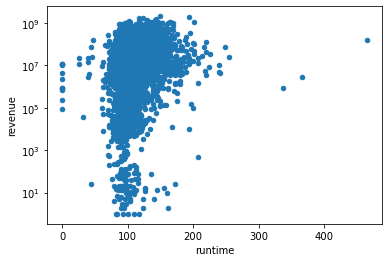

In [49]:
df_crew.plot.scatter('runtime', 'revenue')
plt.yscale('log')